In [2]:
# Load necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import scipy.stats as stats  
import statsmodels.api as sm 
import pingouin as pg 
from statsmodels.formula.api import ols
import statsmodels.api as sm
from statistics import mean, stdev
from math import sqrt

In [3]:
# Load dataset
jamb = pd.read_csv(r"C:\Users\USER\Downloads\jamb2.csv")
jamb.head()

,student_id,age,gender,socioeconomic_status,parent_education_level,teacher_quality,distance_to_school,school_type,school_location,parent_involvement,it_knowledge,attendance_rate,extra_tutorials,access_to_learning_materials,jamb_score,study_hours_per_week,assignments_completed
0,1,17,Male,Low,Tertiary,4.0,12.4,Public,Urban,High,Medium,78,Yes,Yes,192,22.0,2
1,2,15,Male,High,NaN,4.0,2.7,Public,Rural,High,High,88,No,Yes,207,14.0,1
2,3,20,Female,High,Tertiary,2.0,9.6,Public,Rural,High,Medium,87,Yes,Yes,182,29.0,2
3,4,22,Female,Medium,Tertiary,2.0,2.6,Public,Urban,Medium,High,99,No,Yes,210,29.0,1
4,5,22,Female,Medium,Tertiary,3.0,8.8,Public,Urban,Medium,Medium,98,No,Yes,199,12.0,1


In [4]:
jamb.columns

Index(['student_id', 'age', 'gender', 'socioeconomic_status',
       'parent_education_level', 'teacher_quality', 'distance_to_school',
       'school_type', 'school_location', 'parent_involvement', 'it_knowledge',
       'attendance_rate', 'extra_tutorials', 'access_to_learning_materials',
       'jamb_score', 'study_hours_per_week', 'assignments_completed'],
      dtype='object')

In [5]:
jamb.shape

(5000, 17)

In [6]:
jamb.describe()

,student_id,age,teacher_quality,distance_to_school,attendance_rate,jamb_score,study_hours_per_week,assignments_completed
count,5000.000000,5000.000000,4978.000000,4923.000000,5000.000000,5000.000000,4991.000000,5000.000000
mean,2500.500000,18.445800,2.520892,10.009039,84.215200,174.074600,19.523142,1.804600
std,1443.520003,2.301504,0.985563,4.824701,9.470609,47.616477,9.630936,0.992076
min,1.000000,15.000000,1.000000,0.000000,50.000000,100.000000,0.000000,1.000000
25%,1250.750000,16.000000,2.000000,6.600000,78.000000,135.000000,13.000000,1.000000
50%,2500.500000,18.000000,2.000000,10.000000,84.000000,170.000000,19.000000,1.000000
75%,3750.250000,20.000000,3.000000,13.500000,91.000000,209.000000,26.000000,2.000000
max,5000.000000,22.000000,5.000000,20.000000,100.000000,367.000000,40.000000,5.000000


In [7]:
# Check for duplicate columns
print(jamb.columns[jamb.columns.duplicated()])


Index([], dtype='object')


In [8]:
jamb.isna().any()

student_id                      False
age                             False
gender                          False
socioeconomic_status            False
parent_education_level           True
teacher_quality                  True
distance_to_school               True
school_type                      True
school_location                  True
parent_involvement               True
it_knowledge                     True
attendance_rate                 False
extra_tutorials                  True
access_to_learning_materials     True
jamb_score                      False
study_hours_per_week             True
assignments_completed           False
dtype: bool

<Axes: >

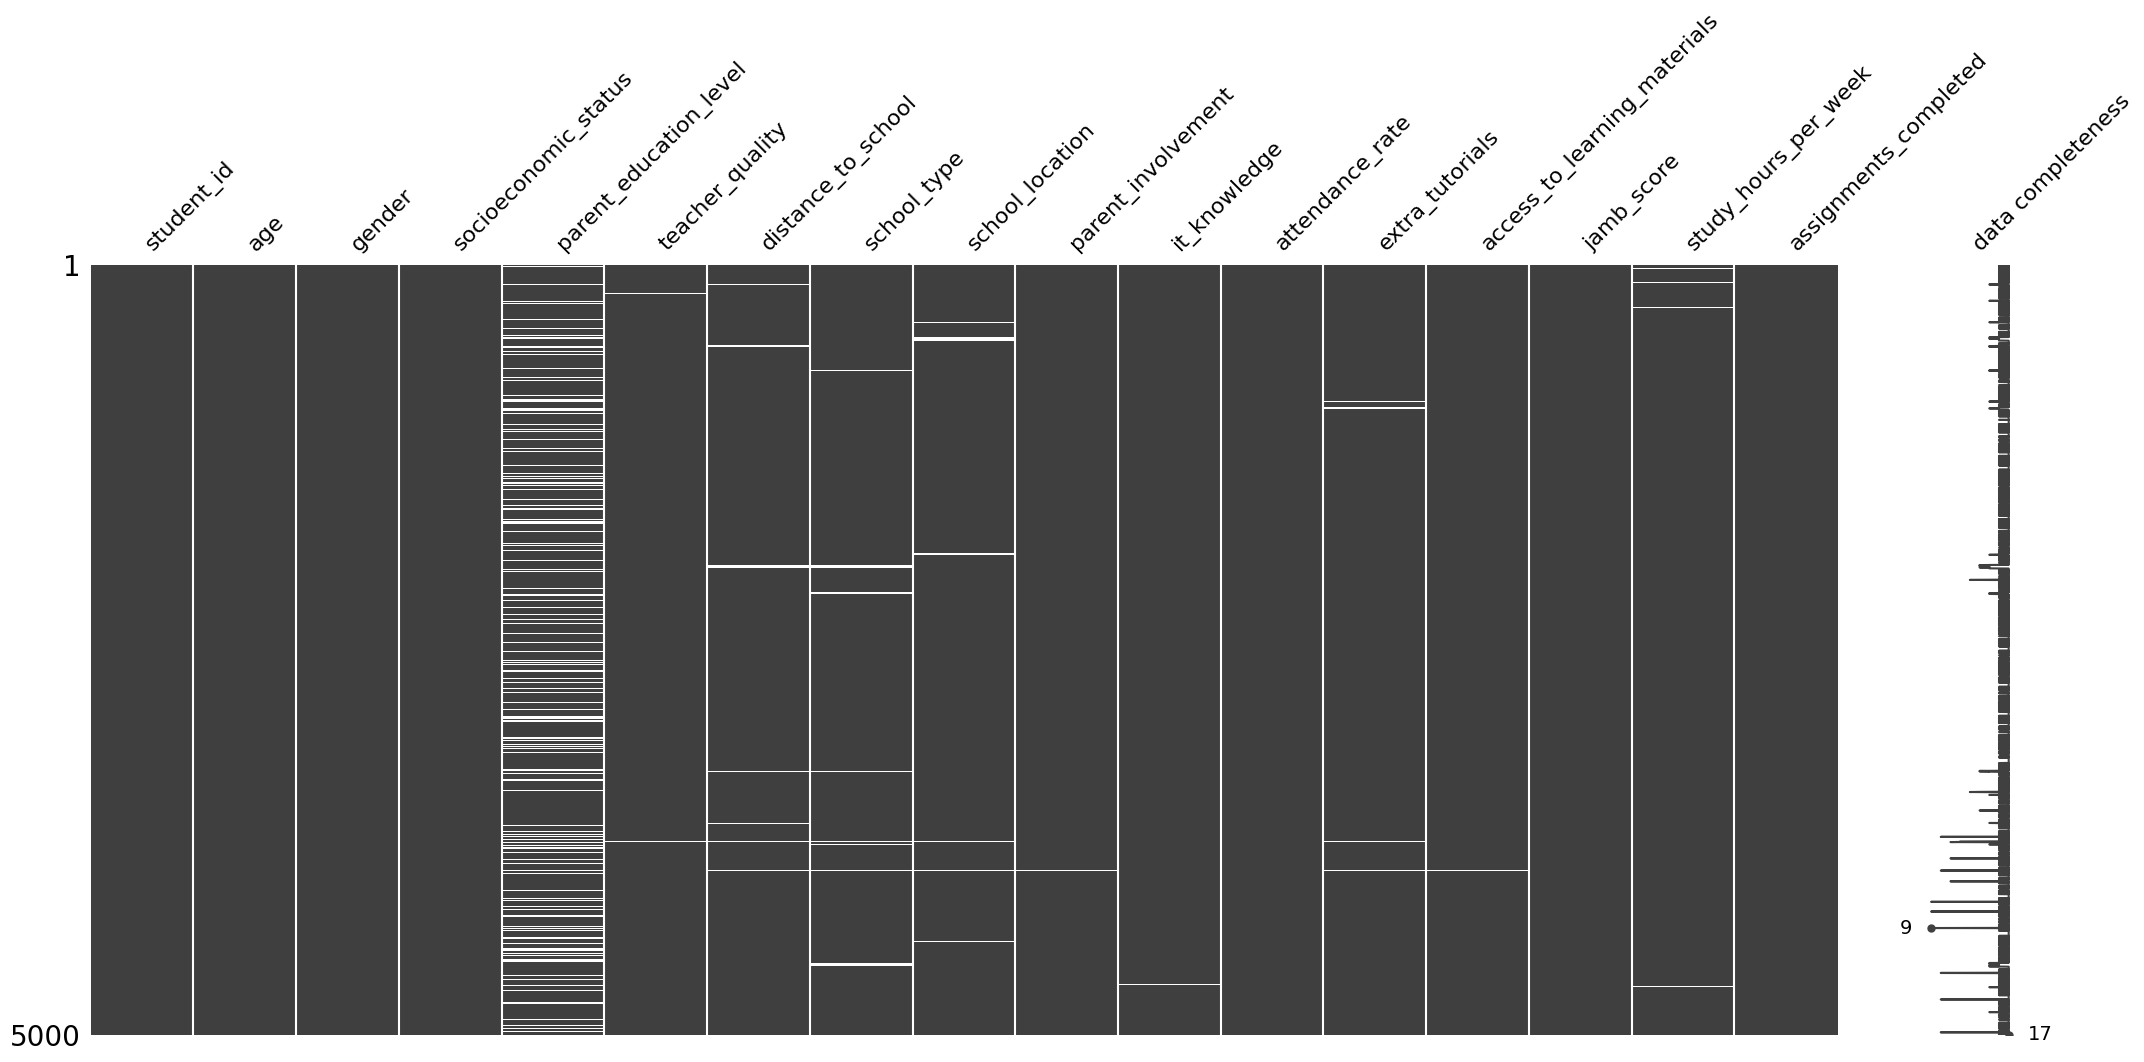

In [9]:
msno.matrix(jamb, labels = True)

In [10]:
jamb_mising_values = jamb.isna().sum()
jamb_mising_values

student_id                        0
age                               0
gender                            0
socioeconomic_status              0
parent_education_level          891
teacher_quality                  22
distance_to_school               77
school_type                     101
school_location                  65
parent_involvement               17
it_knowledge                      5
attendance_rate                   0
extra_tutorials                  36
access_to_learning_materials     15
jamb_score                        0
study_hours_per_week              9
assignments_completed             0
dtype: int64

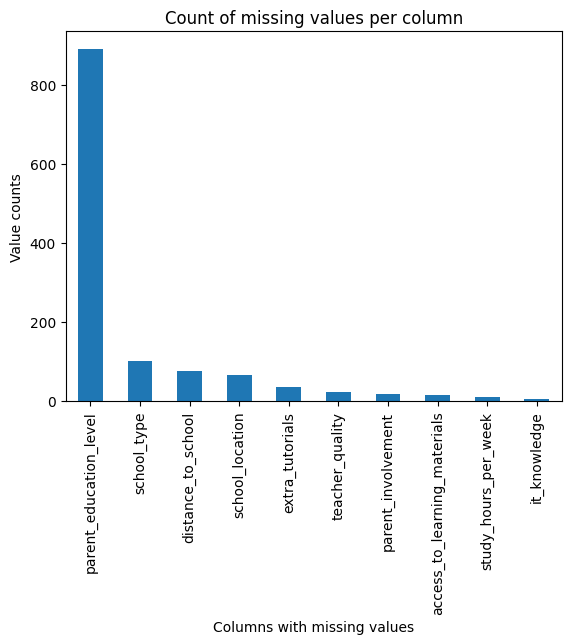

In [11]:
# Visualizing missing values
jamb_mising_values = jamb_mising_values[jamb_mising_values >0].sort_values(ascending = False)
jamb_mising_values.plot(kind = "bar")

plt.title("Count of missing values per column")
plt.xlabel("Columns with missing values")
plt.ylabel("Value counts")
plt.show()

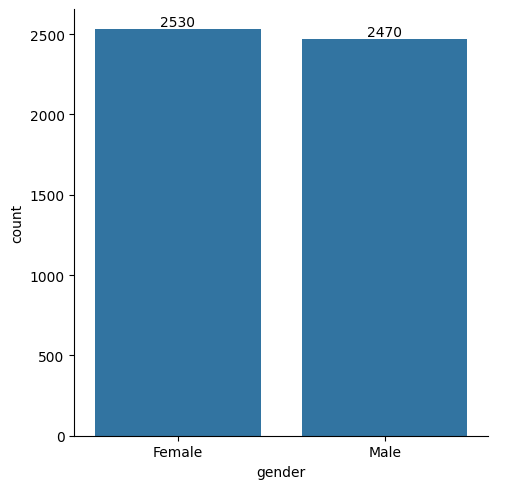

In [64]:
gender_dist = jamb.groupby("gender")["jamb_score"].size().reset_index()
gender_dist.columns = ["gender", "count"]
ax = sns.catplot(data = gender_dist, x = "gender", y = "count", kind = "bar")
ax = sns.barplot(data = gender_dist, x = "gender", y = "count")
ax.bar_label(ax.containers[0])
plt.show()

In [12]:
jamb["teacher_quality"]

0       4.0
1       4.0
2       2.0
3       2.0
4       3.0
       ... 
4995    2.0
4996    2.0
4997    3.0
4998    2.0
4999    1.0
Name: teacher_quality, Length: 5000, dtype: float64

In [52]:
st_hour = jamb["study_hours_per_week"].fillna(jamb["study_hours_per_week"].mean())
att = jamb["attendance_rate"]
tea_qua = jamb["teacher_quality"].fillna(round(jamb["teacher_quality"].mean(), 2), inplace = True)

print("_Study_Hour_Per_Week_")
print(st_hour)
print("_Attendance_Rate_")
print("\n", att)
print("_Teacher_Quality_")
print("\n", tea_qua)

_Study_Hour_Per_Week_
0       22.0
1       14.0
2       29.0
3       29.0
4       12.0
        ... 
4995    20.0
4996     0.0
4997    17.0
4998    15.0
4999    34.0
Name: study_hours_per_week, Length: 5000, dtype: float64
_Attendance_Rate_

 0        78
1        88
2        87
3        99
4        98
       ... 
4995     74
4996     80
4997     89
4998     96
4999    100
Name: attendance_rate, Length: 5000, dtype: int64
_Teacher_Quality_

 None


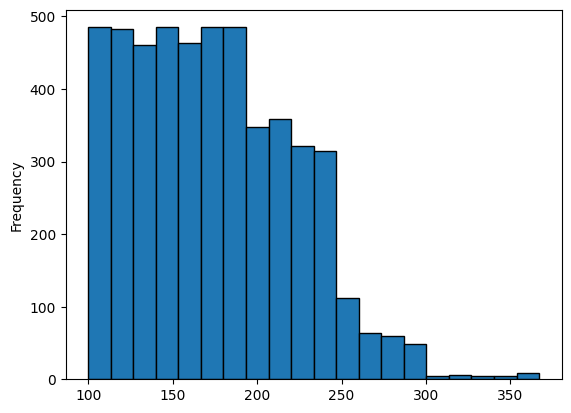

In [67]:
jamb["jamb_score"].plot(kind='hist', bins=20, edgecolor='black')


plt.show()

In [68]:
skewness = jamb["jamb_score"].skew()
print(f'Skewness: {skewness}')

Skewness: 0.4878897037478575


In [ ]:
grouped_scores = [jamb[jamb['Teacher_Quality'] == quality]['JAMB_Score'] for quality in sorted(df['Teacher_Quality'].unique())]

# Perform Kruskal-Wallis test
h_statistic, p_value = kruskal(*grouped_scores)

# Display results
print(f"Kruskal-Wallis H-statistic: {h_statistic}, P-value: {p_value}")

# Interpretation
if p_value < 0.05:
    print("There is a statistically significant difference in JAMB scores across teacher quality levels.")
else:
    print("There is no statistically significant difference in JAMB scores across teacher quality levels.")

## 1. Analyze JAMB Scores Based on Study and School-Related Factors

In [14]:
print(jamb["study_hours_per_week"].isna().sum(), "\n", jamb["teacher_quality"].isna().sum())

9 
 0


In [15]:
descriptive = jamb[["jamb_score", "study_hours_per_week", "teacher_quality", "attendance_rate"]].describe()
print(descriptive)

        jamb_score  study_hours_per_week  teacher_quality  attendance_rate
count  5000.000000           4991.000000      5000.000000      5000.000000
mean    174.074600             19.523142         2.520892        84.215200
std      47.616477              9.630936         0.983392         9.470609
min     100.000000              0.000000         1.000000        50.000000
25%     135.000000             13.000000         2.000000        78.000000
50%     170.000000             19.000000         2.000000        84.000000
75%     209.000000             26.000000         3.000000        91.000000
max     367.000000             40.000000         5.000000       100.000000


In [57]:
# Round all values to the nearest whole number

jamb["teacher_quality"] = jamb["teacher_quality"].round()

In [58]:
uniq_qual = jamb.groupby("teacher_quality")["jamb_score"].sum()
uniq_qual

teacher_quality
1.0    117443
2.0    291715
3.0    304351
4.0    132205
5.0     24659
Name: jamb_score, dtype: int64

In [16]:
correlation_matrix = descriptive.corr()
correlation_matrix

,jamb_score,study_hours_per_week,teacher_quality,attendance_rate
jamb_score,1.000000,0.998813,0.998536,0.999094
study_hours_per_week,0.998813,1.000000,0.999982,0.999919
teacher_quality,0.998536,0.999982,1.000000,0.999871
attendance_rate,0.999094,0.999919,0.999871,1.000000


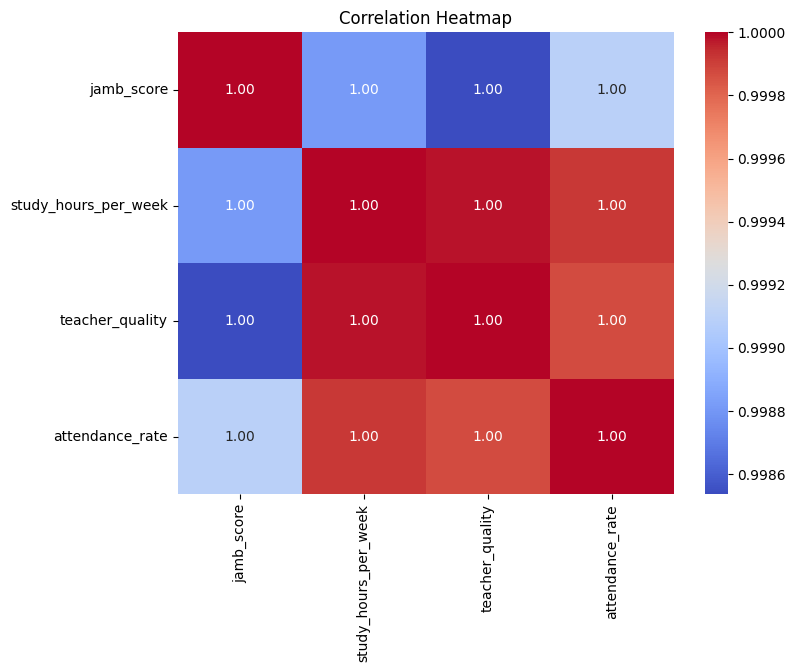

In [17]:
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot = True, cmap = "coolwarm", fmt = ".2f")
plt.title("Correlation Heatmap")
plt.show()

In [66]:
# Hypothesis Testing for Gender and Jamb Score
male_gen = jamb[jamb["gender"] == "Male"]["jamb_score"]
female_gen = jamb[jamb["gender"] == "Female"]["jamb_score"]
t_stat, p_value = stats.ttest_ind(male_gen, female_gen)
print(f"T-Statistics: {t_stat}, p-value: {p_value}")

T-Statistics: -1.0349885859156795, p-value: 0.30072431558508816


In [18]:
jamb["study_hours_per_week"]

0       22.0
1       14.0
2       29.0
3       29.0
4       12.0
        ... 
4995    20.0
4996     0.0
4997    17.0
4998    15.0
4999    34.0
Name: study_hours_per_week, Length: 5000, dtype: float64

## 2. Investigate the Impact of Socioeconomic Status and Parental Education on Student Performance

In [19]:
socio = jamb["socioeconomic_status"].isna().sum()
parent = jamb["parent_education_level"].isna().sum()

print('_Socio_Economic_')
print(socio, "\n")
print('_Parent_education_level_')
print(parent)

_Socio_Economic_
0 

_Parent_education_level_
891


In [20]:
jamb["parent_education_level"].fillna(value = "None")

0        Tertiary
1            None
2        Tertiary
3        Tertiary
4        Tertiary
          ...    
4995      Primary
4996    Secondary
4997      Primary
4998    Secondary
4999         None
Name: parent_education_level, Length: 5000, dtype: object

In [21]:
jamb["parent_education_level"].unique()

array(['Tertiary', nan, 'Primary', 'Secondary'], dtype=object)

In [22]:
count_parent_education = jamb["parent_education_level"].value_counts()
count_parent_education

parent_education_level
Secondary    1556
Primary      1335
Tertiary     1218
Name: count, dtype: int64

<Figure size 800x600 with 0 Axes>

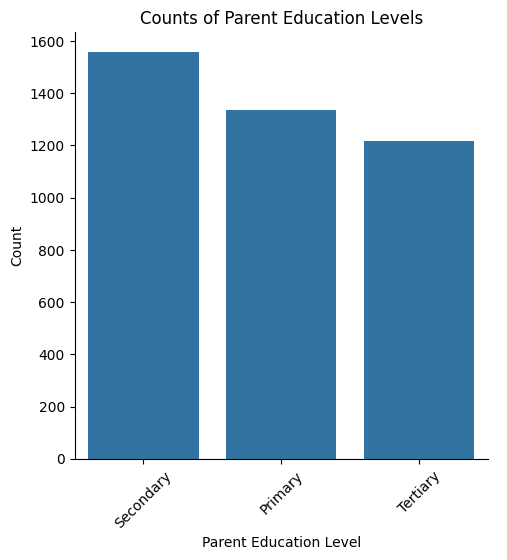

In [23]:
c_p_education = jamb["parent_education_level"].value_counts().reset_index()
c_p_education.columns = ["parent_education_level", "count"]
plt.figure(figsize=(8,6))
sns.catplot(data= c_p_education, x = "parent_education_level", y = "count", kind = "bar")
plt.title("Counts of Parent Education Levels")
plt.xlabel("Parent Education Level")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

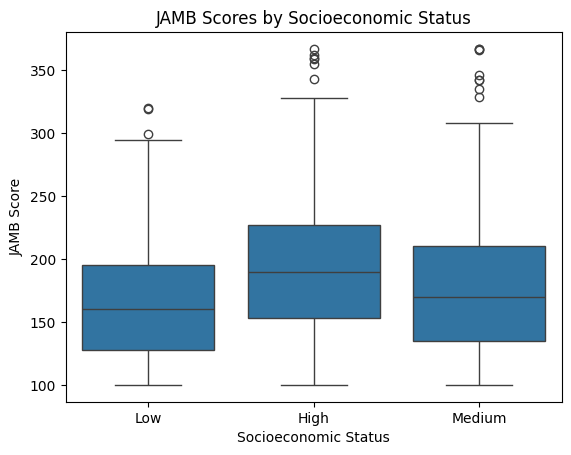

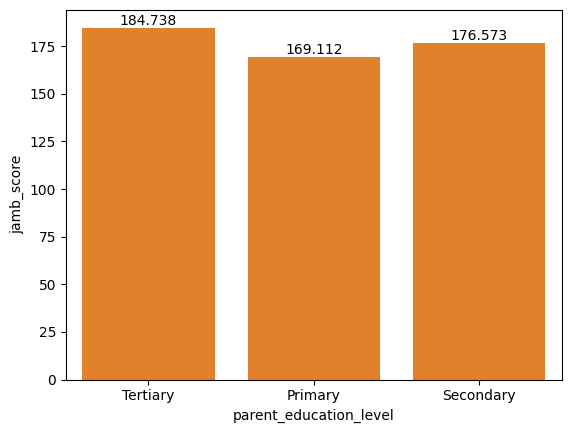

In [24]:
# Socio Economic Status and Jamb Score
sns.boxplot(data = jamb, x = "socioeconomic_status", y = "jamb_score")
plt.title("JAMB Scores by Socioeconomic Status")
plt.xlabel("Socioeconomic Status")
plt.ylabel("JAMB Score")
plt.show()

# Parental Eduaction Level and Jamb Score
ax = sns.barplot(data=jamb, x= "parent_education_level", y= "jamb_score", errorbar = None)
ax = sns.barplot(x= "parent_education_level", y= "jamb_score", data = jamb, errorbar = None)
ax.bar_label(ax.containers[0])

plt.show()

In [25]:
# Perform ANOVA test
f_statistic, p_value = stats.f_oneway(
    jamb[jamb['socioeconomic_status'] == 'Low']["jamb_score"],
    jamb[jamb['socioeconomic_status'] == 'Medium']["jamb_score"],
    jamb[jamb['socioeconomic_status'] == 'High']["jamb_score"]
)

print(f'F-statistic for Socioeconomic Status: {f_statistic}, p-value: {p_value}')


F-statistic for Socioeconomic Status: 107.97024426459544, p-value: 1.2416986871835047e-46


In [26]:
# F test
f_statistic, p_value = stats.f_oneway(
    jamb[jamb['parent_education_level'] == 'Primary']['jamb_score'],
    jamb[jamb['parent_education_level'] == 'Secondary']['jamb_score'],
    jamb[jamb['parent_education_level'] == 'Tertiary']['jamb_score'],
    jamb[jamb['parent_education_level'] == 'None']['jamb_score']
)

print(f'F-statistic: {f_statistic}, p-value: {p_value}')



F-statistic: nan, p-value: nan


C:\Users\USER\AppData\Local\Temp\ipykernel_16844\531852070.py:2: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  f_statistic, p_value = stats.f_oneway(


In [27]:


# Perform Tukey's HSD post-hoc test
post_hoc_results = pg.pairwise_tukey(dv='jamb_score', between='parent_education_level', data=jamb)
print(post_hoc_results)


           A          B     mean(A)     mean(B)       diff        se  \
0    Primary  Secondary  169.112360  176.573265  -7.460905  1.793518   
1    Primary   Tertiary  169.112360  184.738095 -15.625736  1.904970   
2  Secondary   Tertiary  176.573265  184.738095  -8.164830  1.839297   

          T   p-tukey    hedges  
0 -4.159928  0.000096 -0.156772  
1 -8.202614  0.000000 -0.329222  
2 -4.439104  0.000028 -0.166066  


## 3. Analyze the Comparison of Performance Between Public and Private Schools

In [28]:
unique_schools = jamb["school_type"].unique()
unique_schools_count = jamb["school_type"].nunique()
num_missing_school_type = jamb["school_type"].isna().sum()
unique_school_location = jamb["school_location"].unique()
unique_school_location_count = jamb["school_location"].nunique()
num_missing_school_location = jamb["school_location"].isna().sum()
print("_Unique Schools_")
print(unique_schools, "\n")
print("_Number of Unique Schools_")
print(unique_schools_count, "\n")
print("_Number of Missing School Type_")
print(num_missing_school_type, "\n")
print("_Unique School Locations_")
print(unique_school_location, "\n")
print("_Number of Unique School Locations_")
print("\n", unique_school_location_count, "\n")
print("_Number of Missing School Locations_")
print(num_missing_school_location)


_Unique Schools_
['Public' 'Private' nan] 

_Number of Unique Schools_
2 

_Number of Missing School Type_
101 

_Unique School Locations_
['Urban' 'Rural' nan] 

_Number of Unique School Locations_

 2 

_Number of Missing School Locations_
65


<Figure size 800x600 with 0 Axes>

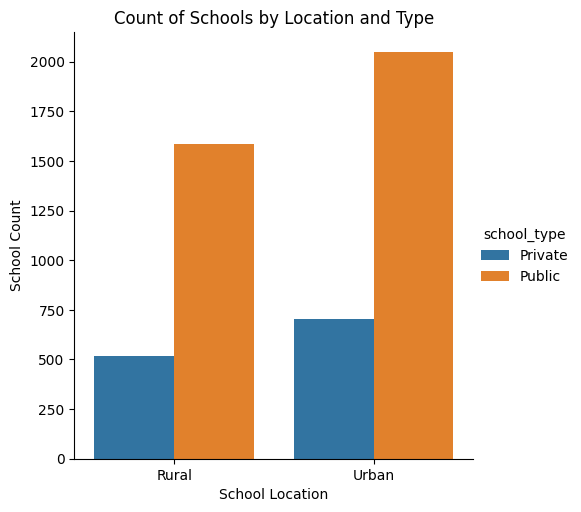

In [29]:
school_count = jamb.groupby(["school_location", "school_type"]).size().reset_index(name = "count")
plt.figure(figsize = (8,6))
ax = sns.catplot(data = school_count, x = "school_location", y = "count", hue = "school_type", kind = "bar")
plt.title("Count of Schools by Location and Type")
plt.xlabel("School Location")
plt.ylabel("School Count")
plt.show()

In [30]:
# Show student count by school type, min and max score by school type and median
studentScore_schoolType = jamb.groupby("school_type")["jamb_score"].describe()
print(studentScore_schoolType)


              count        mean        std    min    25%    50%    75%    max
school_type                                                                  
Private      1237.0  181.218270  49.065532  100.0  143.0  178.0  217.0  367.0
Public       3662.0  171.573184  46.888419  100.0  133.0  167.0  204.0  367.0


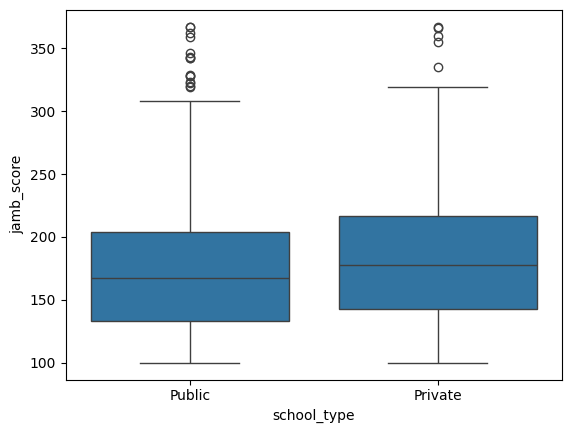

In [31]:
sns.boxplot(data = jamb, x = "school_type", y = "jamb_score")
plt.show()

### Hypothesis
Null Hypothesis (H₀): There is no significant difference in the JAMB scores of students from public and private schools.

Alternative Hypothesis (H₁): There is a significant difference in the JAMB scores of students from public and private schools.

In [32]:
# T_Test

public_score = jamb[jamb["school_type"] == "Public"]["jamb_score"]
private_score = jamb[jamb["school_type"] == "Private"]["jamb_score"]

t_test, p_value = stats.ttest_ind(public_score, private_score)
print(f"T-statistics: {t_test}, p-value: {p_value}")

alpha = 0.05
if p_value <= alpha:
        print(f"The result is significant with p_value {p_value}. We reject the null Hypothesis.")
else:
    print(f"The result is not significant with p_value {p_value}. We fail to reject the null hypothesis.")

T-statistics: -6.181366107442631, p-value: 6.870393989690454e-10
The result is significant with p_value 6.870393989690454e-10. We reject the null Hypothesis.


In [33]:
# Effect size

cohens_d =  (mean(private_score) - mean(public_score)) / (sqrt((stdev(private_score) ** 2 + stdev(public_score) ** 2) / 2))
print(f"cohens_d: {cohens_d}")

cohens_d: 0.20098399591383742


In [34]:
# while there is a statistically significant difference between the JAMB scores of public and private school students (as confirmed by the t-test), the practical significance of this difference is relatively small. In practical terms, this means that while private school students generally perform better, the magnitude of this difference isn't large.
#While the t-test showed a significant difference, the small effect size suggests that although private school students outperform public school students, the overall impact of school type on performance may not be as substantial as one might assume. There could be other factors contributing to student success beyond just the type of school they attend.

## 4. Analyze the Effect of IT Knowledge on JAMB Performance

In [35]:
unique_it_knowledge = jamb["it_knowledge"].unique()
count_unique_itKnowledge = jamb["it_knowledge"].nunique()
number_missing_it_knowledge = jamb["it_knowledge"].isna().sum()
print(unique_it_knowledge, "\n")
print(f"There are {count_unique_itKnowledge} unique IT Knowledge Categories", "\n")
print("There are {number_missing_it_knowledge} missing values")

['Medium' 'High' 'Low' nan] 

There are 3 unique IT Knowledge Categories 

There are {number_missing_it_knowledge} missing values


In [36]:
jamb.groupby("it_knowledge")["jamb_score"].describe()

,count,mean,std,min,25%,50%,75%,max
it_knowledge,,,,,,,,
High,1187.0,187.347936,48.202140,100.0,150.0,186.0,223.0,367.0
Low,1841.0,166.840304,45.077054,100.0,128.0,162.0,198.0,346.0
Medium,1967.0,172.850534,47.981601,100.0,135.0,168.0,207.0,367.0


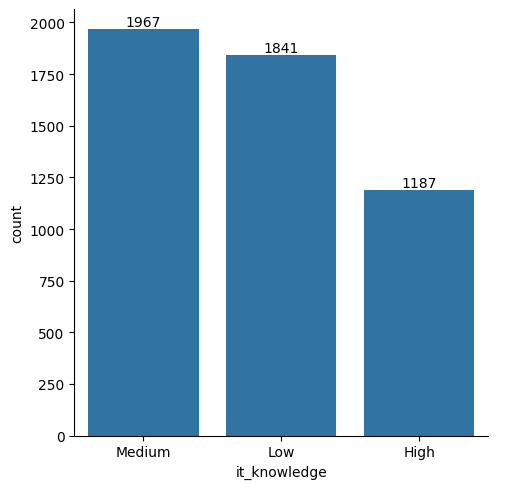

In [37]:
score_by_itKnowledge = jamb.groupby("it_knowledge")["jamb_score"].size().sort_values(ascending = False).reset_index()
score_by_itKnowledge.columns = ["it_knowledge", "count"]
ax = sns.catplot(data = score_by_itKnowledge, x = "it_knowledge", y = "count", kind = "bar", errorbar = None)
ax = sns.barplot(data = score_by_itKnowledge, x = "it_knowledge", y ="count")
ax.bar_label(ax.containers[0])

plt.show()

In [38]:
# Assuming your dataframe is 'jamb' and 'JAMB_Score' is the dependent variable
# 'IT_Knowledge' is the independent variable with categories 'Low', 'Medium', 'High'

# Step 1: Fit the model
model = ols('jamb_score ~ C(it_knowledge)', data=jamb).fit()

# Step 2: Perform ANOVA
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)

# Step 3: Interpretation
# Extracting the p-value
p_value = anova_table['PR(>F)'][0]  # this will give you the p-value of IT_Knowledge

# Set the significance level (alpha)
alpha = 0.05

# Step 4: Compare p-value to significance level
if p_value <= alpha:
    print(f"The result is significant with p-value {p_value}. We reject the null hypothesis.")
else:
    print(f"The result is not significant with p-value {p_value}. We fail to reject the null hypothesis.")


                       sum_sq      df          F        PR(>F)
C(it_knowledge)  3.084232e+05     2.0  69.853408  1.201710e-30
Residual         1.102057e+07  4992.0        NaN           NaN
The result is significant with p-value 1.2017103356516121e-30. We reject the null hypothesis.


C:\Users\USER\AppData\Local\Temp\ipykernel_16844\809071670.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  p_value = anova_table['PR(>F)'][0]  # this will give you the p-value of IT_Knowledge


## 5. Check the Influence of Extra Tutorials on Student Success

In [39]:
jamb["extra_tutorials"].isna().sum()

np.int64(36)

In [40]:
jamb.groupby("extra_tutorials")["jamb_score"].describe()

,count,mean,std,min,25%,50%,75%,max
extra_tutorials,,,,,,,,
No,2261.0,170.449359,46.554590,100.0,131.0,166.0,202.0,367.0
Yes,2703.0,177.009989,48.223982,100.0,138.0,173.0,213.0,367.0


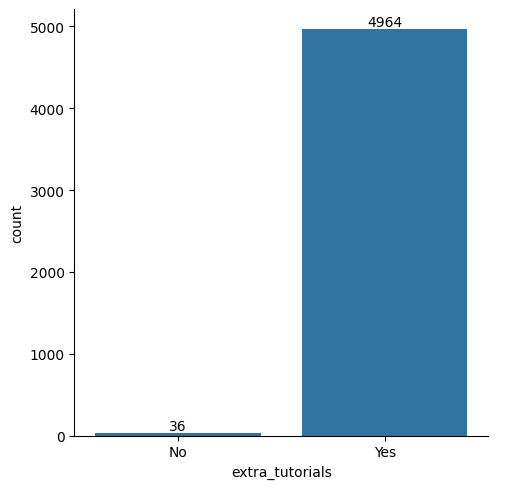

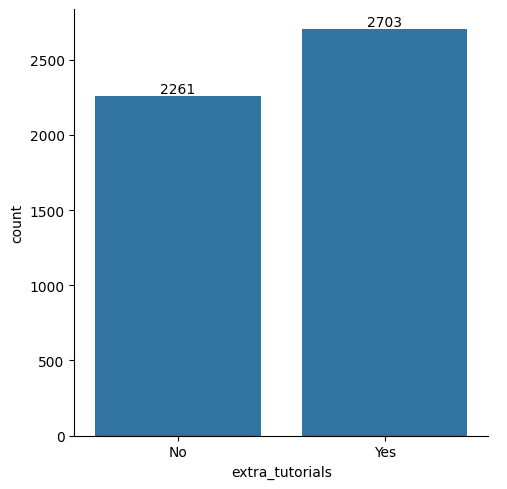

In [41]:

# Missing values in the extra_tutorials column
missing_values = jamb["extra_tutorials"].isna().sum()
non_missing_values = jamb["extra_tutorials"].notnull().sum()
miss_non = pd.DataFrame({
    "extra_tutorials" : ["No", "Yes"],
    "count" : [missing_values, non_missing_values]
})
ax = sns.catplot(data = miss_non, x = "extra_tutorials", y = "count", kind = "bar", errorbar = None)
ax = sns.barplot(x = "extra_tutorials", y = "count", data = miss_non)
ax.bar_label(ax.containers[0])
plt.show()

# Number of students by category type
tutorial_score = jamb.groupby("extra_tutorials")["jamb_score"].size().sort_values().reset_index()
tutorial_score.columns = ["extra_tutorials", "count"]

ax = sns.catplot(data = tutorial_score, x = "extra_tutorials", y = "count", kind = "bar")
ax = sns.barplot(data = tutorial_score, x = "extra_tutorials", y = "count")
ax.bar_label(ax.containers[0])
plt.show()


### Hypothesis Testing

Null Hypothesis (H0):
There is no significant difference in JAMB scores between students who attended extra tutorials and those who did not.

Alternative Hypothesis (H1):
There is a significant difference in JAMB scores between students who attended extra tutorials and those who did not.

In [42]:
# T-test for comparing JAMB scores between students who attended tutorials and those who didn't
yes_tutorials = jamb[jamb["extra_tutorials"] == "Yes"]["jamb_score"]
no_tutorials = jamb[jamb["extra_tutorials"] == "No"]["jamb_score"]

t_stat, p_value = stats.ttest_ind(yes_tutorials, no_tutorials)
print(f'T-statistic: {t_stat}, p-value: {p_value}')


T-statistic: 4.849258526464968, p-value: 1.2771051424979533e-06


In [43]:
model = ols("jamb_score ~ C(extra_tutorials)", data = jamb).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)

                          sum_sq      df          F    PR(>F)
C(extra_tutorials)  5.299147e+04     1.0  23.515308  0.000001
Residual            1.118181e+07  4962.0        NaN       NaN


In [44]:
# Assuming you have separated the groups based on extra tutorials
yes_tutorials = jamb[jamb["extra_tutorials"] == 'Yes']["jamb_score"]
no_tutorials = jamb[jamb["extra_tutorials"] == 'No']["jamb_score"]

# Cohen's d calculation
mean_diff = yes_tutorials.mean() - no_tutorials.mean()
pooled_std = np.sqrt((yes_tutorials.var() + no_tutorials.var()) / 2)
cohen_d = mean_diff / pooled_std
print(f"Cohen's d: {cohen_d}")


Cohen's d: 0.13841974235496532


In [45]:
print(jamb["assignments_completed"].isna().sum())
print("\n", jamb["assignments_completed"].describe())
print(jamb["assignments_completed"].unique())

0

 count    5000.000000
mean        1.804600
std         0.992076
min         1.000000
25%         1.000000
50%         1.000000
75%         2.000000
max         5.000000
Name: assignments_completed, dtype: float64
[2 1 4 3 5]


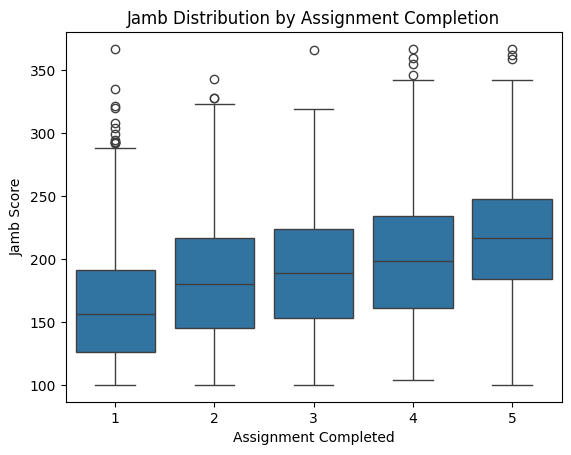

In [46]:
sns.boxplot(data = jamb, y = "jamb_score", x = "assignments_completed")
plt.title("Jamb Distribution by Assignment Completion")
plt.xlabel("Assignment Completed")
plt.ylabel("Jamb Score")
plt.show()

In [47]:
jamb.head()

,student_id,age,gender,socioeconomic_status,parent_education_level,teacher_quality,distance_to_school,school_type,school_location,parent_involvement,it_knowledge,attendance_rate,extra_tutorials,access_to_learning_materials,jamb_score,study_hours_per_week,assignments_completed
0,1,17,Male,Low,Tertiary,4.0,12.4,Public,Urban,High,Medium,78,Yes,Yes,192,22.0,2
1,2,15,Male,High,NaN,4.0,2.7,Public,Rural,High,High,88,No,Yes,207,14.0,1
2,3,20,Female,High,Tertiary,2.0,9.6,Public,Rural,High,Medium,87,Yes,Yes,182,29.0,2
3,4,22,Female,Medium,Tertiary,2.0,2.6,Public,Urban,Medium,High,99,No,Yes,210,29.0,1
4,5,22,Female,Medium,Tertiary,3.0,8.8,Public,Urban,Medium,Medium,98,No,Yes,199,12.0,1
